---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [8]:
def answer_one():
    
    df=pd.read_csv('fraud_data.csv')
    a=len(df[df['Class']==1])/len(df)
    
    return a


In [9]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [10]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    dummy=DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
    a=dummy.score(X_test,y_test)
    r=recall_score(y_test,dummy.predict(X_test))
    
    return (a,r)

In [11]:
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [12]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    svc=SVC().fit(X_train,y_train)
    a=svc.score(X_test,y_test)
    r=recall_score(y_test,svc.predict(X_test))
    p=precision_score(y_test,svc.predict(X_test))
    
    return (a,r,p)

In [13]:
answer_three()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9907817109144543, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [132]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    
    clf=SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    y_score=clf.decision_function(X_test)
    y_predict=clf.predict(X_test)
 
    _, _, thresholds = precision_recall_curve(y_test, y_score)
    y_predict[y_score>=-220]=1
    y_predict[y_score<-220]=0
    a=confusion_matrix(y_test,y_predict)
    return a

In [133]:
answer_four()

array([[5320,   24],
       [  14,   66]])

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

clf=SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
y_score=clf.decision_function(X_test)
y_predict=clf.predict(X_test)

In [145]:
yp2=y_predict
yp2[y_score>=-220]=1
yp2[y_score<-220]=0
confusion_matrix(y_test,yp2)

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


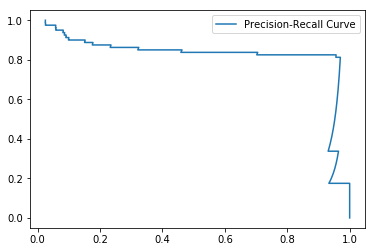

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression().fit(X_train,y_train)
y_scores_lr=lr.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)

plt.figure()
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.legend()

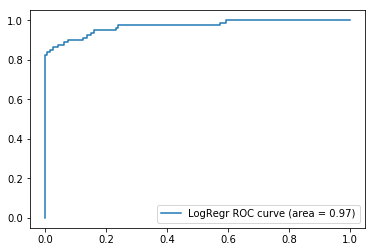

In [31]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_scores_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.legend()

In [47]:
(recall[np.where(precision==0.75)][0], tpr[np.where(np.around(fpr,2)==0.16)][0])

(0.825, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [61]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    clf = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
    grid_clf = GridSearchCV(clf, param_grid=grid_values, scoring='recall',cv=3)
    a=grid_clf.fit(X_train, y_train)
    
    return a.cv_results_

In [62]:
df=pd.DataFrame(answer_six())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

In [107]:
b=df[['params','mean_test_score']]
b

,params,mean_test_score
0,"{'C': 0.01, 'penalty': 'l1'}",0.666667
1,"{'C': 0.01, 'penalty': 'l2'}",0.760870
2,"{'C': 0.1, 'penalty': 'l1'}",0.800725
3,"{'C': 0.1, 'penalty': 'l2'}",0.804348
4,"{'C': 1, 'penalty': 'l1'}",0.811594
5,"{'C': 1, 'penalty': 'l2'}",0.811594
6,"{'C': 10, 'penalty': 'l1'}",0.807971
7,"{'C': 10, 'penalty': 'l2'}",0.811594
8,"{'C': 100, 'penalty': 'l1'}",0.807971
9,"{'C': 100, 'penalty': 'l2'}",0.811594


In [111]:
b=np.concatenate([b,np.zeros((10,1))*2],axis=1)

In [112]:
b=pd.DataFrame(b)

i=0
while i <len(b):
    c=b.iloc[i][0]['C']
    p=b.iloc[i][0]['penalty']
    b.iloc[i][2]=c
    b.iloc[i][3]=p
    i+=1


In [113]:
bb=b[[1,2,3]]
bb.columns=['mean_test_score','C','penalty']
bb

,mean_test_score,C,penalty
0,0.666667,0.01,l1
1,0.76087,0.01,l2
2,0.800725,0.1,l1
3,0.804348,0.1,l2
4,0.811594,1,l1
5,0.811594,1,l2
6,0.807971,10,l1
7,0.811594,10,l2
8,0.807971,100,l1
9,0.811594,100,l2


In [119]:
six=bb.pivot('C','penalty')
six

mean_test_score          
penalty              l1        l2
C                                
0.01           0.666667   0.76087
0.10           0.800725  0.804348
1.00           0.811594  0.811594
10.00          0.807971  0.811594
100.00         0.807971  0.811594